In [1]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        img = img.resize((224,224))
        img = img.convert('RGB')
        x = np.array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [3]:
image_dir = "fruits/datasets/"

feature_extractor = FeatureExtractor()

# List to store features and image paths
features = []
image_paths = []

# Extract features for each image
for img_path in sorted(Path(image_dir).glob('*')):
    print(img_path)
    img = Image.open(img_path)
    feature = feature_extractor.extract(img)
    features.append(feature)
    image_paths.append(str(img_path))

# Convert lists to numpy arrays
features = np.array(features)
image_paths = np.array(image_paths)

# Save features and image paths to files
np.save("fruits/features.npy", features)
np.save("fruits/image_paths.npy", image_paths)

fruits\dataset\fruits (1).jpeg
1/1 [==============================] - 3s 3s/step
fruits\dataset\fruits (1).jpg
1/1 [==============================] - 1s 670ms/step
fruits\dataset\fruits (1).png
1/1 [==============================] - 1s 668ms/step
fruits\dataset\fruits (10).jpeg
1/1 [==============================] - 1s 664ms/step
fruits\dataset\fruits (10).jpg
1/1 [==============================] - 1s 703ms/step
fruits\dataset\fruits (10).png
1/1 [==============================] - 1s 645ms/step
fruits\dataset\fruits (100).jpg
1/1 [==============================] - 1s 669ms/step
fruits\dataset\fruits (101).jpg
1/1 [==============================] - 1s 677ms/step
fruits\dataset\fruits (102).jpg
1/1 [==============================] - 1s 812ms/step
fruits\dataset\fruits (103).jpg
1/1 [==============================] - 1s 701ms/step
fruits\dataset\fruits (104).jpg
1/1 [==============================] - 1s 849ms/step
fruits\dataset\fruits (105).jpg
1/1 [==============================] - 1s 6

Fruits List.
1. Apple
2. Banana
3. Grapes
4. Cherry
5. Orange
1/1 [==============================] - 1s 915ms/step


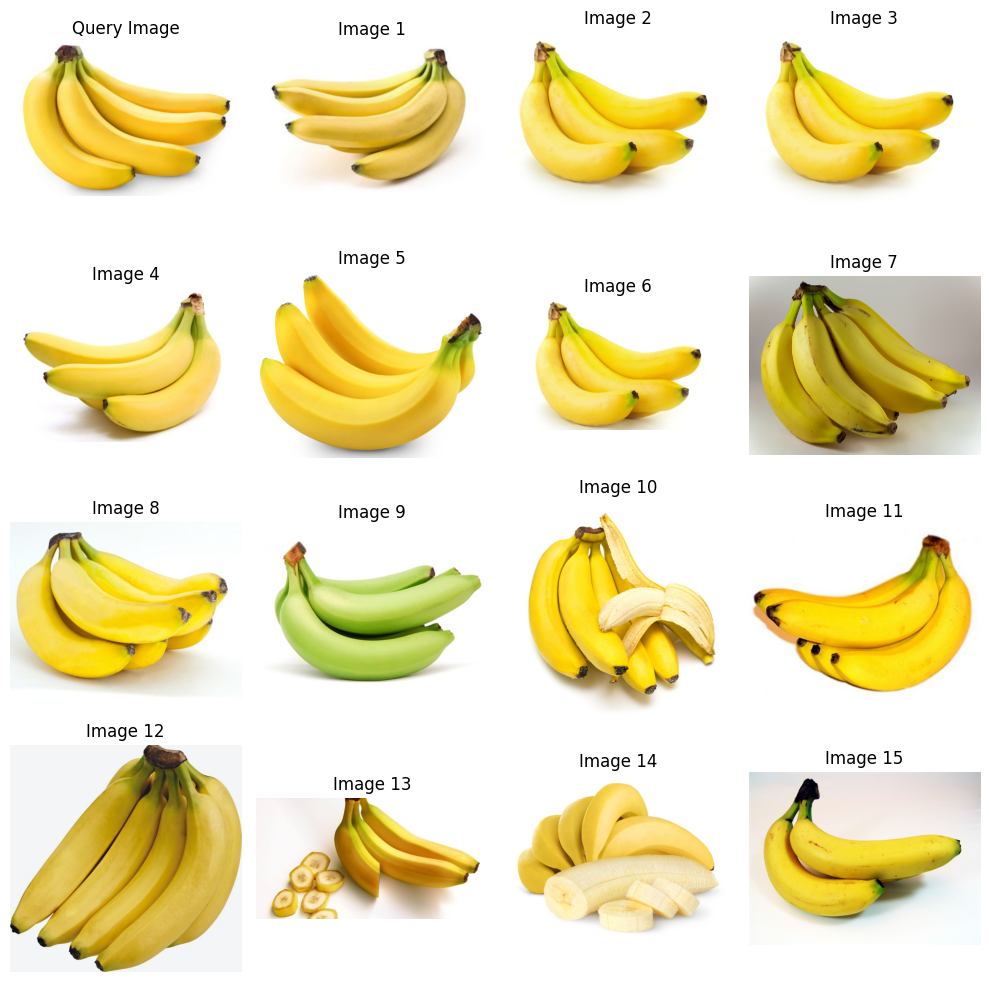

In [4]:
# Load saved features and image paths
features = np.load("fruits/features.npy")
image_paths = np.load("fruits/image_paths.npy")

print('Fruits List.')
print('1. Apple')
print('2. Banana')
print('3. Grapes')
print('4. Cherry')
print('5. Orange')

sel  = int(input('Select: '))

if sel == 1:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesApel.jpg")
elif sel == 2:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesPisang.jpg")
elif sel == 3:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesAnggur.jpg")
elif sel == 4:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesCeri.jpg")
elif sel == 5:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesJeruk.jpg")
    
query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Specify the number of retrieved images
num_retrieved_images = 15

# Display the query image and retrieved images
num_rows = int(np.ceil((num_retrieved_images + 1) / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, (image_path, ax) in enumerate(zip(retrieved_images, axes.flatten()[1:])):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

# Remove empty subplots if necessary
if (num_retrieved_images + 1) % 4 != 0:
    for j in range((num_retrieved_images + 1) % 4, 4):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()